In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [195]:
df= pd.read_csv(r"C:\Users\srika\Downloads\mail_data.csv")


Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
5        spam  FreeMsg Hey there darling it's been 3 week's n...
6         ham  Even my brother is not like to speak with me. ...
7         ham  As per your request 'Melle Melle (Oru Minnamin...
8        spam  WINNER!! As a valued network customer you have...
9        spam  Had your mobile 11 months or more? U R entitle...
10        ham  I'm gonna be home soon and i don't want to tal...
11       spam  SIX chances to win CASH! From 100 to 20,000 po...
12       spam  URGENT! You have won a 1 week FREE membership ...
13        ham  I've been searching for the right words to tha...
14        ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15       spam  XXXMobileMovieClub: To use your credit, click ...
16        ham                         Oh k...i'm watching here:)
17        ham  Eh u remember how 2 spell his name... Yes i di...
18        ham  Fine if thats the way u feel. Thats the way ...
19       spam  England v Macedonia - dont miss the goals/team...
20        ham          Is that seriously how you spell his name?
21        ham    I‘m going to try for 2 months ha ha only joking
22        ham  So ü pay first lar... Then when is da stock co...
23        ham  Aft i finish my lunch then i go str down lor. ...
24        ham  Ffffffffff. Alright no way I can meet up with ...
25        ham  Just forced myself to eat a slice. I'm really ...
26        ham                     Lol your always so convincing.
27        ham  Did you catch the bus ? Are you frying an egg ...
28        ham  I'm back &amp; we're packing the car now, I'll...
29        ham  Ahhh. Work. I vaguely remember that! What does...
30        ham  Wait that's still not all that clear, were you...
31        ham  Yeah he got in at 2 and was v apologetic. n ha...
32        ham                      K tell me anything about you.
33        ham  For fear of fainting with the of all that hous...
34       spam  Thanks for your subscription to Ringtone UK yo...
35        ham  Yup... Ok i go home look at the timings then i...
36        ham    Oops, I'll let you know when my roommate's done
37        ham                       I see the letter B on my car
38        ham                        Anything lor... U decide...
39        ham  Hello! How's you and how did saturday go? I wa...
40        ham  Pls go ahead with watts. I just wanted to be s...
41        ham  Did I forget to tell you ? I want you , I need...
42       spam  07732584351 - Rodger Burns - MSG = We tried to...
43        ham                                WHO ARE YOU SEEING?
44        ham  Great! I hope you like your man well endowed. ...
45        ham                   No calls..messages..missed calls
46        ham      Didn't you get hep b immunisation in nigeria.
47        ham                    Fair enough, anything going on?
48        ham  Yeah hopefully, if tyler can't do it I could m...
49        ham  U don't know how stubborn I am. I didn't even ...
50        ham  What you thinked about me. First time you saw ...
51        ham  A gram usually runs like  &lt;#&gt; , a half e...
52        ham  K fyi x has a ride early tomorrow morning but ...
53        ham  Wow. I never realized that you were so embaras...
54       spam  SMS. ac Sptv: The New Jersey Devils and the De...
55        ham  Do you know what Mallika Sherawat did yesterda...
56       spam  Congrats! 1 year special cinema pass for 2 is ...
57        ham                 Sorry, I'll call later in meeting.
58        ham                             Tell where you reached
59        ham           Yes..gauti and sehwag out of odi series.
60        ham  Your gonna have to pick u

In [197]:
df

Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
5        spam  FreeMsg Hey there darling it's been 3 week's n...
6         ham  Even my brother is not like to speak with me. ...
7         ham  As per your request 'Melle Melle (Oru Minnamin...
8        spam  WINNER!! As a valued network customer you have...
9        spam  Had your mobile 11 months or more? U R entitle...
10        ham  I'm gonna be home soon and i don't want to tal...
11       spam  SIX chances to win CASH! From 100 to 20,000 po...
12       spam  URGENT! You have won a 1 week FREE membership ...
13        ham  I've been searching for the right words to tha...
14        ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15       spam  XXXMobileMovieClub: To use your credit, click ...
16        ham                         Oh k...i'm watching here:)
17        ham  Eh u remember how 2 spell his name... Yes i di...
18        ham  Fine if thats the way u feel. Thats the way ...
19       spam  England v Macedonia - dont miss the goals/team...
20        ham          Is that seriously how you spell his name?
21        ham    I‘m going to try for 2 months ha ha only joking
22        ham  So ü pay first lar... Then when is da stock co...
23        ham  Aft i finish my lunch then i go str down lor. ...
24        ham  Ffffffffff. Alright no way I can meet up with ...
25        ham  Just forced myself to eat a slice. I'm really ...
26        ham                     Lol your always so convincing.
27        ham  Did you catch the bus ? Are you frying an egg ...
28        ham  I'm back &amp; we're packing the car now, I'll...
29        ham  Ahhh. Work. I vaguely remember that! What does...
30        ham  Wait that's still not all that clear, were you...
31        ham  Yeah he got in at 2 and was v apologetic. n ha...
32        ham                      K tell me anything about you.
33        ham  For fear of fainting with the of all that hous...
34       spam  Thanks for your subscription to Ringtone UK yo...
35        ham  Yup... Ok i go home look at the timings then i...
36        ham    Oops, I'll let you know when my roommate's done
37        ham                       I see the letter B on my car
38        ham                        Anything lor... U decide...
39        ham  Hello! How's you and how did saturday go? I wa...
40        ham  Pls go ahead with watts. I just wanted to be s...
41        ham  Did I forget to tell you ? I want you , I need...
42       spam  07732584351 - Rodger Burns - MSG = We tried to...
43        ham                                WHO ARE YOU SEEING?
44        ham  Great! I hope you like your man well endowed. ...
45        ham                   No calls..messages..missed calls
46        ham      Didn't you get hep b immunisation in nigeria.
47        ham                    Fair enough, anything going on?
48        ham  Yeah hopefully, if tyler can't do it I could m...
49        ham  U don't know how stubborn I am. I didn't even ...
50        ham  What you thinked about me. First time you saw ...
51        ham  A gram usually runs like  &lt;#&gt; , a half e...
52        ham  K fyi x has a ride early tomorrow morning but ...
53        ham  Wow. I never realized that you were so embaras...
54       spam  SMS. ac Sptv: The New Jersey Devils and the De...
55        ham  Do you know what Mallika Sherawat did yesterda...
56       spam  Congrats! 1 year special cinema pass for 2 is ...
57        ham                 Sorry, I'll call later in meeting.
58        ham                             Tell where you reached
59        ham           Yes..gauti and sehwag out of odi series.
60        ham  Your gonna have to pick u

In [168]:
pd.set_option('display.max_rows',None)
pd.set_option('display.min_rows',None)

In [169]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
5        spam  FreeMsg Hey there darling it's been 3 week's n...
6         ham  Even my brother is not like to speak with me. ...
7         ham  As per your request 'Melle Melle (Oru Minnamin...
8        spam  WINNER!! As a valued network customer you have...
9        spam  Had your mobile 11 months or more? U R entitle...
10        ham  I'm gonna be home soon and i don't want to tal...
11       spam  SIX chances to win CASH! From 100 to 20,000 po...
12       spam  URGENT! You have won a 1 week FREE membership ...
13        ham  I've been searching for the right words to tha...
14        ham            

In [170]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [171]:
data = df.where((pd.notnull(df)),'')

In [172]:
data

Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
5        spam  FreeMsg Hey there darling it's been 3 week's n...
6         ham  Even my brother is not like to speak with me. ...
7         ham  As per your request 'Melle Melle (Oru Minnamin...
8        spam  WINNER!! As a valued network customer you have...
9        spam  Had your mobile 11 months or more? U R entitle...
10        ham  I'm gonna be home soon and i don't want to tal...
11       spam  SIX chances to win CASH! From 100 to 20,000 po...
12       spam  URGENT! You have won a 1 week FREE membership ...
13        ham  I've been searching for the right words to tha...
14        ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15       spam  XXXMobileMovieClub: To use your credit, click ...
16        ham                         Oh k...i'm watching here:)
17        ham  Eh u remember how 2 spell his name... Yes i di...
18        ham  Fine if thats the way u feel. Thats the way ...
19       spam  England v Macedonia - dont miss the goals/team...
20        ham          Is that seriously how you spell his name?
21        ham    I‘m going to try for 2 months ha ha only joking
22        ham  So ü pay first lar... Then when is da stock co...
23        ham  Aft i finish my lunch then i go str down lor. ...
24        ham  Ffffffffff. Alright no way I can meet up with ...
25        ham  Just forced myself to eat a slice. I'm really ...
26        ham                     Lol your always so convincing.
27        ham  Did you catch the bus ? Are you frying an egg ...
28        ham  I'm back &amp; we're packing the car now, I'll...
29        ham  Ahhh. Work. I vaguely remember that! What does...
30        ham  Wait that's still not all that clear, were you...
31        ham  Yeah he got in at 2 and was v apologetic. n ha...
32        ham                      K tell me anything about you.
33        ham  For fear of fainting with the of all that hous...
34       spam  Thanks for your subscription to Ringtone UK yo...
35        ham  Yup... Ok i go home look at the timings then i...
36        ham    Oops, I'll let you know when my roommate's done
37        ham                       I see the letter B on my car
38        ham                        Anything lor... U decide...
39        ham  Hello! How's you and how did saturday go? I wa...
40        ham  Pls go ahead with watts. I just wanted to be s...
41        ham  Did I forget to tell you ? I want you , I need...
42       spam  07732584351 - Rodger Burns - MSG = We tried to...
43        ham                                WHO ARE YOU SEEING?
44        ham  Great! I hope you like your man well endowed. ...
45        ham                   No calls..messages..missed calls
46        ham      Didn't you get hep b immunisation in nigeria.
47        ham                    Fair enough, anything going on?
48        ham  Yeah hopefully, if tyler can't do it I could m...
49        ham  U don't know how stubborn I am. I didn't even ...
50        ham  What you thinked about me. First time you saw ...
51        ham  A gram usually runs like  &lt;#&gt; , a half e...
52        ham  K fyi x has a ride early tomorrow morning but ...
53        ham  Wow. I never realized that you were so embaras...
54       spam  SMS. ac Sptv: The New Jersey Devils and the De...
55        ham  Do you know what Mallika Sherawat did yesterda...
56       spam  Congrats! 1 year special cinema pass for 2 is ...
57        ham                 Sorry, I'll call later in meeting.
58        ham                             Tell where you reached
59        ham           Yes..gauti and sehwag out of odi series.
60        ham  Your gonna have to pick u

In [173]:
df.head(10)


Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [175]:
data.shape

(5572, 2)

In [176]:
#data.loc[data['Category'] == 'spam', 'category',] = 0
#data.loc[data['Category'] == 'ham', 'category',] = 1

In [177]:

#X = df['Message']


In [178]:
#Y = data['Category']
# Assuming df is your DataFrame
df['Category'] = df['Category'].replace({'spam':0, 'ham':1})
X = df['Message']
Y = df['Category']

In [179]:
print(Y)

0       1
1       1
2       0
3       1
4       1
5       0
6       1
7       1
8       0
9       0
10      1
11      0
12      0
13      1
14      1
15      0
16      1
17      1
18      1
19      0
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      0
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      0
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      0
55      1
56      0
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      0
66      1
67      0
68      0
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      0
94      1
95      0
96      1
97      1
98      1
99      1


In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 3)

In [181]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [182]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)



In [183]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [184]:
print(X_train)


3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
2413    I don't know u and u don't know me. Send CHAT ...
4539     Dare i ask... Any luck with sorting out the car?
3000    Oh, then your phone phoned me but it disconnected
2433    Really dun bluff me leh... U sleep early too. ...
2403    Oh oh... Wasted... Den muz chiong on sat n sun...
5151    No problem with the renewal. I.ll do it right ...
4294    You best watch what you say cause I get drunk ...
4423              MMM ... Fuck .... Merry Christmas to me
4235    Now only i reached home. . . I am very tired n...
2577                 In sch but neva mind u eat 1st lor..
1361    Yo dude guess who just got arrested the other day
840     Last chance 2 claim ur £150 worth of discount ...
4977    You ar

In [185]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [186]:
from sklearn.linear_model import LogisticRegression

# Now you can use LogisticRegression
model = LogisticRegression()



In [187]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [188]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("Accuracy", accuracy_on_training_data)

Accuracy 0.9670181736594121


In [189]:
prediction_on_testing_data = model.predict(X_test_features)
accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_testing_data)
print("Accuracy", accuracy_on_testing_data)

Accuracy 0.9659192825112107


In [190]:
input = ["Hi SRIKANTH,Welcome to Day 12. We’re delving into object-oriented programming with today’s Inheritance challenge! Keep up the great work, coders."]

In [191]:
input_data_features = feature_extraction.transform(input)
prediction = model.predict(input_data_features)
prediction
if(prediction == 1):
    print('ham')
else:
    print('spam')

ham


In [192]:
#input = ["This is the 2nd time we have tried to contact u. You have won the A$400 prize. 2. claim is easy, just call 0597446748 NOW! Only 10p per minute. BT-national-rate"]

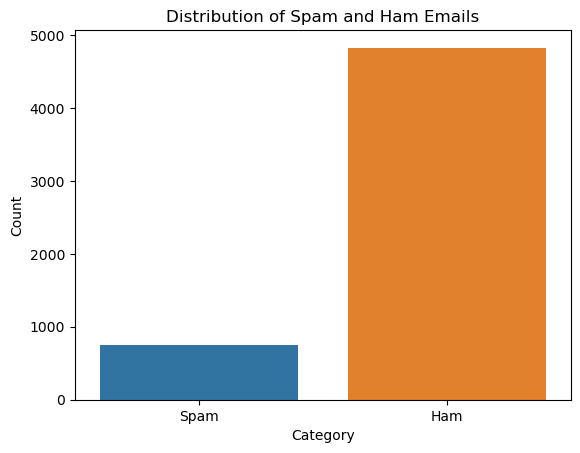

In [193]:
sns.countplot(x=Y, data=df)  # Assuming Y is the name of the target variable
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks([0, 1], ['Spam', 'Ham'])
plt.show()